Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [1.  ]
 [0.89]]
Predicted Output for Range: 
0[[0.88700292]
 [0.88321157]
 [0.8800145 ]]
Loss for Range: 
00.004942685056204401
Predicted Output for Range: 
1[[0.8894612 ]
 [0.88538228]
 [0.88250424]]
Loss for Range: 
10.0047086752817406
Predicted Output for Range: 
2[[0.8917256 ]
 [0.88738887]
 [0.8847988 ]]
Loss for Range: 
20.00450258707102186
Predicted Output for Range: 
3[[0.89381861]
 [0.88924993]
 [0.88692061]]
Loss for Range: 
30.004320175249083613
Predicted Output for Range: 
4[[0.89575928]
 [0.8909813 ]
 [0.88888871]]
Loss for Range: 
40.004157974539274294
Predicted Output for Range: 
5[[0.8975639 ]
 [0.89259654]
 [0.89071938]]
Loss for Range: 
50.004013132890299227
Predicted Output for Range: 
6[[0.89924647]
 [0.89410733]
 [0.89242666]]
Loss for Range: 
60.003883285092419676
Predicted Output for Range: 
7[[0.90081909]
 [0.89552379]
 [0.89402268]]
Loss for Ran

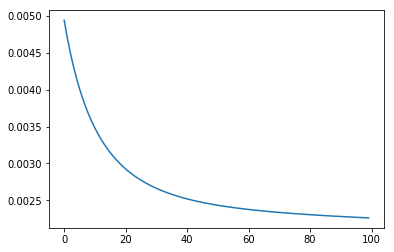

In [7]:
import numpy as np
from matplotlib import pyplot

# X = (hours studying, hours sleeping), y = score on test, xPredicted = 4 hours studying & 8 hours sleeping (input data for prediction)
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [100], [89]), dtype=float)

xPredicted = np.array(([4, 8]), dtype=float)

# scale units
X = X / np.amax(X, axis=0)  # maximum of X array
xPredicted = xPredicted / np.amax(
    xPredicted,
    axis=0)  # maximum of xPredicted (our input data for the prediction)
y = y / 100  # max test score is 100
LossArray = []
Range = []

class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

        #weights
        self.W1 = np.random.randn(
            self.inputSize,
            self.hiddenSize)  # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(
            self.hiddenSize,
            self.outputSize)  # (3x1) weight matrix from hidden to output layer

    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(
            X,
            self.W1)  # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z)  # activation function
        self.z3 = np.dot(
            self.z2, self.W2
        )  # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.sigmoid(self.z3)  # final activation function
        return o

    def sigmoid(self, s):
        # activation function
        return 1 / (1 + np.exp(-s))

    def sigmoidPrime(self, s):
        #derivative of sigmoid
        return s * (1 - s)

    def backward(self, X, y, o):
        # backward propgate through the network
        self.o_error = y - o  # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(
            o)  # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(
            self.W2.T
        )  # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error * self.sigmoidPrime(
            self.z2)  # applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(
            self.z2_delta)  # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(
            self.o_delta)  # adjusting second set (hidden --> output) weights

    def train(self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)

    def saveWeights(self):
        np.savetxt("w1.txt", self.W1, fmt="%s")
        np.savetxt("w2.txt", self.W2, fmt="%s")
 
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)))
        print ("W1" + str(self.W1))
        print ("W2" + str(self.W2))


NN = Neural_Network()
print ("Input (scaled): \n" + str(X))
print ("Actual Output: \n" + str(y))
for i in range(100):  # trains the NN 1,000 times
    #print " #" + str(i) + "\n"
    #print ("Input (scaled): \n" + str(X))
    #print ("Actual Output: \n" + str(y))
    print ("Predicted Output for Range: \n" + str(i) + str(NN.forward(X)))
    print ("Loss for Range: \n" + str(i) + str(np.mean(
        np.square(y - NN.forward(X)))))  # mean sum squared loss
    Loss = (np.mean(
        np.square(y - NN.forward(X))))
    #print "\n"
    NN.train(X, y)
    Range +=[i]
    LossArray += [Loss]


NN.saveWeights()
NN.predict()

print (LossArray)
print (Range)
pyplot.plot(Range,LossArray)
